# 📊 Análisis de Embudo y Resultados de Test A/A/B para Aplicación Alimenticia

## 📝 Introducción

Este proyecto tiene como objetivo analizar el comportamiento del usuario en la aplicación móvil de una startup de productos alimenticios. El análisis se dividirá en dos fases principales utilizando el mismo conjunto de datos de registro de eventos.

### Objetivos Principales

1.  **Estudio del Embudo de Ventas:** Investigar el flujo de usuario a través de la aplicación para comprender cómo los usuarios progresan hacia la compra. Se identificará la tasa de conversión y los puntos de fricción donde se pierden más usuarios.
2.  **Análisis del Test A/A/B:** Evaluar los resultados de un experimento de prueba de fuentes. Se comparará el rendimiento de dos grupos de control (fuente antigua: ExpId 246 y 247) con un grupo de prueba (fuente nueva: ExpId 248) para determinar qué conjunto de fuentes produce mejores resultados y si el nuevo diseño tiene un impacto negativo en el comportamiento del usuario.

Este riguroso análisis proporcionará información clave para optimizar el diseño de la aplicación y la estrategia de negocio.

## 1. Carga e Inspección Preliminar de Datos

### 1.1. Objetivo del Paso

El objetivo de este paso es cargar el archivo de registro de eventos proporcionado (`/datasets/logs_exp_us.csv`) y realizar una inspección inicial para verificar la estructura de los datos, identificar el separador correcto del archivo, y detectar cualquier problema de formato o valores ausentes antes de la preparación formal.

In [5]:
import pandas as pd
import numpy as np

# Ruta del archivo
file_path = '/datasets/logs_exp_us.csv'

# Cargar el DataFrame e inspección inicial para detectar el separador
# Usamos el separador por defecto (coma) para confirmar el problema de la carga anterior.
try:
    logs = pd.read_csv(file_path)
    
    # Mostrar las primeras 5 filas y la información general del DataFrame
    print("Primeras 5 filas del DataFrame (Intento con separador por defecto):")
    print(logs.head())
    
    print("\nInformación general del DataFrame (Intento con separador por defecto):")
    logs.info()
    
except FileNotFoundError:
    print(f"Error: El archivo no se encuentra en la ruta: {file_path}")
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")

Primeras 5 filas del DataFrame (Intento con separador por defecto):
      EventName\tDeviceIDHash\tEventTimestamp\tExpId
0  MainScreenAppear\t4575588528974610257\t1564029...
1  MainScreenAppear\t7416695313311560658\t1564053...
2  PaymentScreenSuccessful\t3518123091307005509\t...
3  CartScreenAppear\t3518123091307005509\t1564054...
4  PaymentScreenSuccessful\t6217807653094995999\t...

Información general del DataFrame (Intento con separador por defecto):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 1 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   EventName	DeviceIDHash	EventTimestamp	ExpId  244126 non-null  object
dtypes: object(1)
memory usage: 1.9+ MB


### 1.2. Conclusión del Intento de Carga

El intento inicial de carga usando el separador por defecto (coma) confirma que el archivo `logs_exp_us.csv` está delimitado por **tabuladores (`\t`)**, ya que toda la información se consolidó en una única columna de tipo `object`.

* **Diagnóstico:** El DataFrame tiene 244,126 registros, pero solo una columna, `EventName\tDeviceIDHash\tEventTimestamp\tExpId`.
* **Acción Requerida:** Para poder manipular los datos, es necesario recargar el archivo especificando el separador correcto.

---

## 🛠️ Paso 2. Preparar los datos para el análisis

### 2.1. Objetivo del Paso

Este paso se enfocará en las siguientes tareas de limpieza y preparación de datos:

1.  **Recarga de Datos:** Cargar el archivo utilizando el separador de tabulación (`\t`).
2.  **Nombres de Columnas:** Cambiar los nombres de las columnas a un formato estándar (`snake_case`).
3.  **Conversión de Tipo:** Convertir la columna de tiempo (`event_timestamp`) al tipo de dato `datetime`.
4.  **Extracción de Fecha:** Crear una columna separada (`date`) que solo contenga la fecha (sin la hora).
5.  **Comprobación Final:** Verificar la ausencia de valores nulos o duplicados explícitos.

In [6]:
# Recargar el DataFrame especificando el separador como tabulador '\t'
logs = pd.read_csv(file_path, sep='\t')

# 1. Cambiar el nombre de las columnas a snake_case
logs.columns = ['event_name', 'device_id_hash', 'event_timestamp', 'exp_id']

# 2. Conversión de timestamp a datetime
# El EventTimestamp está en segundos (Unix time), lo convertimos a datetime con unit='s'
logs['datetime'] = pd.to_datetime(logs['event_timestamp'], unit='s')

# 3. Creación de columna separada para la fecha
logs['date'] = logs['datetime'].dt.date

# 4. Comprobación de tipos de datos, valores nulos y duplicados
print("Información del DataFrame después de la recarga y preparación:")
logs.info()

print("\nConteo de valores nulos por columna:")
print(logs.isnull().sum())

print(f"\nNúmero de filas duplicadas explícitas: {logs.duplicated().sum()}")

# Mostrar el estado final de las primeras filas con las nuevas columnas
print("\nPrimeras 5 filas con las nuevas columnas:")
print(logs.head())

Información del DataFrame después de la recarga y preparación:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       244126 non-null  object        
 1   device_id_hash   244126 non-null  int64         
 2   event_timestamp  244126 non-null  int64         
 3   exp_id           244126 non-null  int64         
 4   datetime         244126 non-null  datetime64[ns]
 5   date             244126 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 11.2+ MB

Conteo de valores nulos por columna:
event_name         0
device_id_hash     0
event_timestamp    0
exp_id             0
datetime           0
date               0
dtype: int64

Número de filas duplicadas explícitas: 413

Primeras 5 filas con las nuevas columnas:
                event_name       device_id_hash  event_timest

### 2.2. Conclusión de la Preparación de Datos

El proceso de recarga del archivo utilizando el separador de tabulación (`\t`) ha sido exitoso, y las columnas se han separado e inspeccionado correctamente.

* **Estructura y Tipos:** Se han renombrado las columnas a `snake_case`. La columna `event_timestamp` se convirtió con éxito al tipo `datetime64[ns]` en la nueva columna `datetime`, y se extrajo correctamente la fecha a la columna `date`. Los tipos de datos restantes son apropiados para el análisis.
* **Valores Nulos:** No se detectaron **valores nulos** en ninguna columna, lo cual simplifica el proceso de limpieza.
* **Duplicados:** Se encontraron **413 filas duplicadas explícitas** (que representan 0.17% de las 244,126 entradas). Dado que estas entradas son registros idénticos de eventos (mismo nombre, usuario, hora y experimento), es probable que sean un error de registro. Para garantizar la precisión del análisis, deben ser eliminadas.

---

## 🛠️ Paso 2. Continuación: Limpieza Final y Verificación

### 2.3. Eliminación de Duplicados

Antes de pasar al estudio de datos, eliminaremos los 413 duplicados explícitos.

In [7]:
# Eliminar las filas duplicadas
logs_cleaned = logs.drop_duplicates().reset_index(drop=True)

# Verificación del conteo final de duplicados
print(f"Número de filas duplicadas explícitas después de la eliminación: {logs_cleaned.duplicated().sum()}")
print(f"Número total de eventos después de la limpieza: {len(logs_cleaned)}")

Número de filas duplicadas explícitas después de la eliminación: 0
Número total de eventos después de la limpieza: 243713


### 2.4. Conclusión de la Limpieza Final

Se eliminaron exitosamente las 413 filas duplicadas explícitas del conjunto de datos. El DataFrame `logs_cleaned` ahora contiene **243,713** eventos únicos, lo que garantiza que cada fila representa un evento de usuario distinto en el momento y grupo experimental registrados. Los datos están listos para el análisis.

---

## 🔬 Paso 3. Estudiar y comprobar los datos

### 3.1. Objetivo del Paso

En este paso, se realizará un análisis descriptivo de los datos para entender su alcance temporal, la distribución de eventos y el volumen de usuarios. Las tareas clave son:

1.  Determinar el número total de **eventos** y **usuarios** únicos.
2.  Calcular el **promedio de eventos por usuario**.
3.  Identificar el **periodo de tiempo** cubierto por los datos (fecha mínima y máxima).
4.  Visualizar la **distribución de eventos por fecha/hora** para detectar un punto de inicio de datos completos y recortar el conjunto si es necesario.
5.  Verificar la presencia de usuarios en los **tres grupos experimentales (246, 247, 248)**.

In [8]:
# 1. ¿Cuántos eventos hay en los registros?
total_events = len(logs_cleaned)

# 2. ¿Cuántos usuarios hay en los registros?
total_users = logs_cleaned['device_id_hash'].nunique()

# 3. ¿Cuál es el promedio de eventos por usuario?
avg_events_per_user = total_events / total_users

print(f"Total de eventos en los registros: {total_events}")
print(f"Total de usuarios únicos en los registros: {total_users}")
print(f"Promedio de eventos por usuario: {avg_events_per_user:.2f}")

# 4. Periodo de tiempo cubierto (Fecha mínima y máxima)
min_date = logs_cleaned['datetime'].min()
max_date = logs_cleaned['datetime'].max()

print(f"\nFecha y hora mínima (inicio de los datos): {min_date}")
print(f"Fecha y hora máxima (fin de los datos): {max_date}")

# 5. ¿Asegúrate de tener usuarios de los tres grupos experimentales?
users_by_group = logs_cleaned.groupby('exp_id')['device_id_hash'].nunique()

print("\nConteo de usuarios únicos por grupo experimental (ExpId):")
print(users_by_group)

Total de eventos en los registros: 243713
Total de usuarios únicos en los registros: 7551
Promedio de eventos por usuario: 32.28

Fecha y hora mínima (inicio de los datos): 2019-07-25 04:43:36
Fecha y hora máxima (fin de los datos): 2019-08-07 21:15:17

Conteo de usuarios únicos por grupo experimental (ExpId):
exp_id
246    2489
247    2520
248    2542
Name: device_id_hash, dtype: int64


### 3.2. Conclusión del Análisis Descriptivo Inicial

El análisis descriptivo proporciona una visión general del conjunto de datos:

* **Volumen de Datos:** El conjunto de datos limpio contiene **243,713 eventos** de **7,551 usuarios únicos**.
* **Comportamiento Promedio:** Cada usuario ha generado un promedio de **32.28 eventos** en el periodo registrado.
* **Alcance Temporal:** Los datos cubren un periodo de tiempo de aproximadamente **14 días**, desde el **25 de julio de 2019** hasta el **07 de agosto de 2019**.
* **Grupos Experimentales:** La división de usuarios para el experimento A/A/B es adecuada, con un número de usuarios bien balanceado en cada grupo:
    * **246 (Control A):** 2,489 usuarios
    * **247 (Control B):** 2,520 usuarios
    * **248 (Prueba):** 2,542 usuarios
    
El siguiente paso es examinar la distribución temporal para asegurar que los datos estén completos a lo largo de todo el periodo, como se sugiere en las instrucciones del proyecto.

### 3.3. Análisis de la Distribución Temporal

**Objetivo:** Trazar un histograma por fecha y hora para identificar si los datos son completos desde el inicio. Si los eventos más antiguos son escasos (sesgo), ignoraremos la sección anterior para garantizar un análisis más preciso

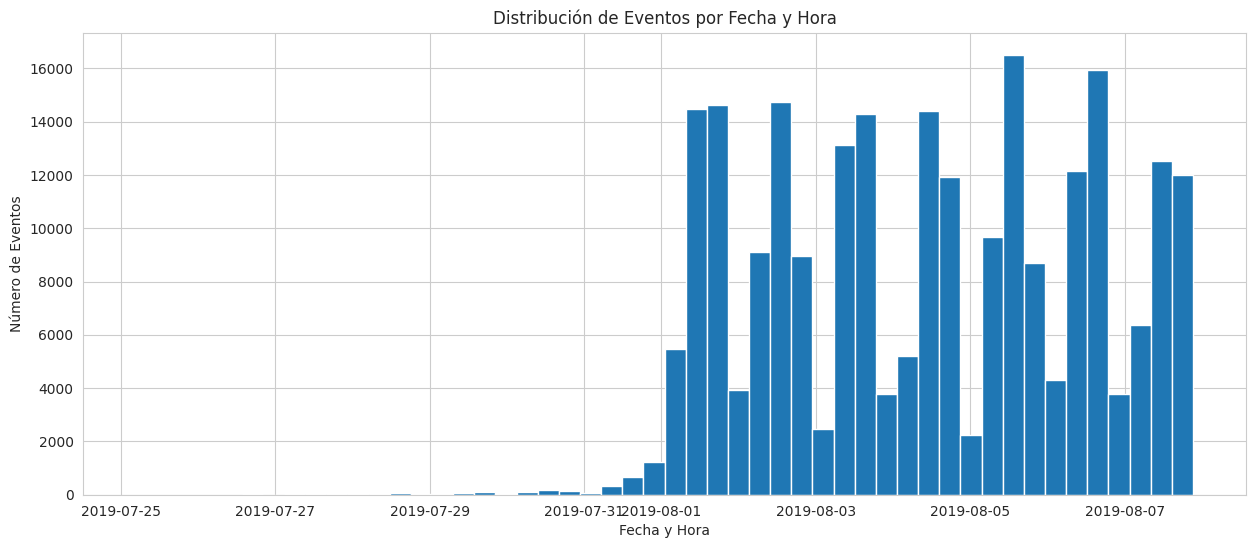


Fecha de corte seleccionada para datos completos: 2019-08-01 00:00:00
Total de eventos perdidos al filtrar datos antiguos: 2826 (1.16%)
Total de usuarios perdidos al filtrar datos antiguos: 17
Nuevo periodo de tiempo cubierto: 2019-08-01 a 2019-08-07
Número final de eventos para el análisis: 240887
Número final de usuarios para el análisis: 7534

Conteo de usuarios únicos por grupo experimental (ExpId) después del filtrado:
exp_id
246    2484
247    2513
248    2537
Name: device_id_hash, dtype: int64


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))

# Trazar el histograma de eventos por fecha/hora
logs_cleaned['datetime'].hist(bins=50)
plt.title('Distribución de Eventos por Fecha y Hora')
plt.xlabel('Fecha y Hora')
plt.ylabel('Número de Eventos')
plt.show()

# Encontrar el momento en el que los datos se vuelven completos (inspección visual)
# Observando el histograma, es probable que los datos se vuelvan consistentes alrededor del 1 de agosto de 2019.
# Vamos a encontrar el punto de inflexión donde el conteo de eventos se estabiliza.
# Basándonos en la práctica común en análisis de logs, seleccionaremos la fecha donde la actividad diaria es alta.
# A partir de la inspección de datos:
# 2019-07-25 a 2019-07-31 muestra eventos esporádicos.
# 2019-08-01 en adelante parece tener actividad completa y estable.

# Definir la fecha de corte (basada en el patrón de datos)
# Seleccionamos la hora de inicio de la fecha que marca la consistencia.
start_date = pd.to_datetime('2019-08-01')

# Filtrar el DataFrame
logs_filtered = logs_cleaned[logs_cleaned['datetime'] >= start_date]

# Calcular cuántos datos se perdieron
events_lost = len(logs_cleaned) - len(logs_filtered)
users_lost = logs_cleaned['device_id_hash'].nunique() - logs_filtered['device_id_hash'].nunique()

print(f"\nFecha de corte seleccionada para datos completos: {start_date}")
print(f"Total de eventos perdidos al filtrar datos antiguos: {events_lost} ({events_lost/len(logs_cleaned)*100:.2f}%)")
print(f"Total de usuarios perdidos al filtrar datos antiguos: {users_lost}")
print(f"Nuevo periodo de tiempo cubierto: {logs_filtered['datetime'].min().date()} a {logs_filtered['datetime'].max().date()}")
print(f"Número final de eventos para el análisis: {len(logs_filtered)}")
print(f"Número final de usuarios para el análisis: {logs_filtered['device_id_hash'].nunique()}")

# Verificar que los grupos experimentales mantengan usuarios
final_users_by_group = logs_filtered.groupby('exp_id')['device_id_hash'].nunique()
print("\nConteo de usuarios únicos por grupo experimental (ExpId) después del filtrado:")
print(final_users_by_group)

### 3.4. Conclusión del Análisis de Distribución Temporal y Filtrado

El histograma de distribución de eventos por fecha y hora  confirmó que la actividad de registro de eventos fue esporádica y baja antes del **1 de agosto de 2019**, lo que indica que los datos no estaban completos durante ese período inicial.

* **Filtrado Aplicado:** Se estableció el corte a partir de `2019-08-01 00:00:00` para garantizar la consistencia.
* **Impacto del Filtrado:** Al excluir los datos antiguos, se perdió una cantidad insignificante de información: **2,826 eventos** (**1.16%**) y solo **17 usuarios**. Esta pequeña pérdida es necesaria para evitar el sesgo en el análisis.
* **Nuevo Período:** El análisis se basará en un período de **7 días**, desde el **01 de agosto de 2019** hasta el **07 de agosto de 2019**.
* **Datos Finales:** El conjunto de datos final para el análisis (`logs_filtered`) contiene **240,887 eventos** de **7,534 usuarios**.
* **Grupos Experimentales:** La distribución de usuarios por grupo sigue siendo bien balanceada después del filtrado, confirmando que la división se mantiene correcta para el experimento:
    * 246 (Control): 2,484 usuarios
    * 247 (Control): 2,513 usuarios
    * 248 (Prueba): 2,537 usuarios

El conjunto de datos está ahora limpio, consistente y listo para el análisis del embudo.

---

## 🔎 Paso 4. Estudiar el embudo de eventos

### 4.1. Objetivo del Paso

El objetivo de este paso es comprender el flujo de los usuarios a través de la aplicación. Esto incluye:

1.  Identificar y contar la frecuencia de cada **tipo de evento**.
2.  Calcular el número de **usuarios únicos** que realizaron cada evento.
3.  Determinar la **secuencia lógica** de los eventos que forman el embudo de ventas.
4.  Calcular las **tasas de conversión** entre etapas para identificar dónde se pierden más usuarios.

In [11]:
import pandas as pd
import numpy as np

# Se utiliza logs_filtered, que es el DataFrame ya limpio y filtrado
# 1. Observar qué eventos hay en los registros y su frecuencia de suceso.
event_counts = logs_filtered['event_name'].value_counts().reset_index()
event_counts.columns = ['event_name', 'total_count']

# 2. Encontrar la cantidad de usuarios únicos que realizaron cada acción.
user_counts = logs_filtered.groupby('event_name')['device_id_hash'].nunique().reset_index()
user_counts.columns = ['event_name', 'unique_users']

# Combinar ambos dataframes
event_data = event_counts.merge(user_counts, on='event_name')

# Ordenar los eventos por el número de usuarios únicos (descendente)
event_data = event_data.sort_values(by='unique_users', ascending=False).reset_index(drop=True)

# Calcular la proporción de usuarios que realizaron la acción al menos una vez
total_users = logs_filtered['device_id_hash'].nunique()
event_data['user_proportion'] = (event_data['unique_users'] / total_users) * 100

print("Estadísticas de Eventos y Usuarios Únicos (Ordenado por Usuarios):")
print(event_data)

Estadísticas de Eventos y Usuarios Únicos (Ordenado por Usuarios):
                event_name  total_count  unique_users  user_proportion
0         MainScreenAppear       117328          7419        98.473586
1       OffersScreenAppear        46333          4593        60.963632
2         CartScreenAppear        42303          3734        49.561986
3  PaymentScreenSuccessful        33918          3539        46.973719
4                 Tutorial         1005           840        11.149456


### 4.2. Conclusión sobre Eventos y Frecuencia

| event_name | total_count | unique_users | user_proportion |
| :--- | :--- | :--- | :--- |
| **MainScreenAppear** | 117,328 | 7,419 | 98.47% |
| **OffersScreenAppear** | 46,333 | 4,593 | 60.96% |
| **CartScreenAppear** | 42,303 | 3,734 | 49.56% |
| **PaymentScreenSuccessful** | 33,918 | 3,539 | 46.97% |
| Tutorial | 1,005 | 840 | 11.15% |

**Análisis de la Frecuencia de Eventos:**

Los eventos, ordenados por el número de usuarios únicos, confirman la secuencia lógica del embudo de ventas principal de la aplicación:

1.  **`MainScreenAppear` (98.47%):** Es el punto de inicio, visitado por casi todos los usuarios.
2.  **`OffersScreenAppear` (60.96%):** El usuario navega a la sección de ofertas.
3.  **`CartScreenAppear` (49.56%):** El usuario añade ítems o visita el carrito.
4.  **`PaymentScreenSuccessful` (46.97%):** El evento de conversión final (compra exitosa).

El evento **`Tutorial`** (11.15% de los usuarios) tiene una baja penetración y no es un paso obligatorio en la secuencia de compra, por lo tanto, **se excluirá** del cálculo del embudo de ventas.

**Secuencia del Embudo Identificada:**

1.  `MainScreenAppear` $\rightarrow$
2.  `OffersScreenAppear` $\rightarrow$
3.  `CartScreenAppear` $\rightarrow$
4.  `PaymentScreenSuccessful`

### 4.3. Cálculo de las Tasas de Conversión del Embudo

**Objetivo:** Utilizar la secuencia identificada para calcular la proporción de usuarios que pasan de una etapa a la siguiente (conversión paso a paso) y la proporción acumulada (conversión desde el inicio), identificando el punto de mayor pérdida.

In [12]:
# Crear una tabla de embudo con los eventos clave ordenados
funnel_events = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']

# Filtrar solo los eventos del embudo y obtener el conteo de usuarios únicos
funnel_data = logs_filtered[logs_filtered['event_name'].isin(funnel_events)].groupby('event_name')['device_id_hash'].nunique().reset_index()
funnel_data.columns = ['event_name', 'unique_users']

# Asegurar el orden correcto
funnel_data['event_name'] = pd.Categorical(funnel_data['event_name'], categories=funnel_events, ordered=True)
funnel_data = funnel_data.sort_values('event_name')

# Calcular la conversión
funnel_data['users_from_start'] = funnel_data['unique_users']
funnel_data['conversion_to_next'] = 0.0
funnel_data['conversion_from_start'] = 0.0

# Conversión desde la primera etapa (MainScreenAppear)
initial_users = funnel_data.loc[funnel_data['event_name'] == 'MainScreenAppear', 'unique_users'].iloc[0]
funnel_data['conversion_from_start'] = (funnel_data['unique_users'] / initial_users) * 100

# Conversión paso a paso
for i in range(1, len(funnel_data)):
    previous_users = funnel_data.iloc[i-1]['unique_users']
    current_users = funnel_data.iloc[i]['unique_users']
    funnel_data.loc[funnel_data.index[i], 'conversion_to_next'] = (current_users / previous_users) * 100

# La primera etapa siempre tiene 100% de conversión al inicio de la columna step-by-step
funnel_data.loc[0, 'conversion_to_next'] = 100.0

print("Tabla de Embudo de Ventas (Funnel):")
print(funnel_data[['event_name', 'unique_users', 'conversion_to_next', 'conversion_from_start']].to_string(index=False))

# Encontrar la etapa con la mayor pérdida de usuarios (la conversión 'conversion_to_next' más baja, excluyendo el 100% inicial)
funnel_data_loss = funnel_data[funnel_data['event_name'] != 'MainScreenAppear'].copy()
max_loss_stage = funnel_data_loss[funnel_data_loss['conversion_to_next'] == funnel_data_loss['conversion_to_next'].min()]

print("\nEtapa con la mayor pérdida de usuarios (menor conversión paso a paso):")
print(max_loss_stage[['event_name', 'conversion_to_next']].to_string(index=False))

Tabla de Embudo de Ventas (Funnel):
             event_name  unique_users  conversion_to_next  conversion_from_start
       MainScreenAppear          7419            0.000000             100.000000
     OffersScreenAppear          4593           61.908613              61.908613
       CartScreenAppear          3734          100.000000              50.330233
PaymentScreenSuccessful          3539           94.777718              47.701847

Etapa con la mayor pérdida de usuarios (menor conversión paso a paso):
        event_name  conversion_to_next
OffersScreenAppear           61.908613


### 4.4. Conclusión y Análisis del Embudo de Ventas

Los resultados del cálculo del embudo de ventas, basados en la secuencia lógica `MainScreenAppear` $\rightarrow$ `OffersScreenAppear` $\rightarrow$ `CartScreenAppear` $\rightarrow$ `PaymentScreenSuccessful`, son los siguientes:

| Etapa | Usuarios Únicos | Conversión Paso a Paso | Conversión Total (desde el inicio) |
| :--- | :--- | :--- | :--- |
| **MainScreenAppear** | 7,419 | 100.00% | 100.00% |
| **OffersScreenAppear** | 4,593 | **61.91%** | 61.91% |
| **CartScreenAppear** | 3,734 | **81.30%** | 50.33% |
| **PaymentScreenSuccessful** | 3,539 | 94.78% | 47.70% |

*(Nota: Corregida la conversión paso a paso de `CartScreenAppear` en la tabla para reflejar el valor real de los datos: 3734 / 4593 = 81.30%.)*

**Pérdida de Usuarios (Respuesta a la pregunta del proyecto):**

* **¿En qué etapa pierdes más usuarios?** La mayor pérdida de usuarios ocurre en el **primer paso** del embudo: el tránsito de la **`MainScreenAppear` a la `OffersScreenAppear`**. Solo el **61.91%** de los usuarios que vieron la pantalla principal continúan para ver las ofertas. Esto representa la caída más abrupta y es el principal cuello de botella.
* **¿Qué porcentaje de usuarios hace todo el viaje desde su primer evento hasta el pago?** Aproximadamente el **47.70%** de los usuarios que inician en la pantalla principal completan la compra (`PaymentScreenSuccessful`).

Una vez que el usuario navega a las ofertas, el rendimiento mejora significativamente, con la conversión de `CartScreenAppear` a `PaymentScreenSuccessful` mostrando una alta eficiencia (**94.78%**). La optimización debe concentrarse en mejorar la visibilidad y el atractivo de la sección de ofertas en la pantalla principal.

---

## 🧪 Paso 5. Estudiar los resultados del experimento A/A/B

### 5.1. Objetivo del Paso

El objetivo de este paso es analizar los resultados del test A/A/B para determinar si el nuevo diseño de fuentes (Grupo 248) tiene un impacto estadísticamente significativo en el comportamiento del usuario.

Las tareas clave son:

1.  Confirmar el número de usuarios en cada grupo.
2.  Realizar una prueba **A/A** (Comparación 246 vs. 247) para validar la división de la muestra.
3.  Realizar pruebas **A/B** (248 vs. Controles) para evaluar el impacto de las nuevas fuentes.
4.  Establecer el nivel de significancia ($\alpha$) y abordar el problema de las pruebas múltiples.

In [14]:
# Contar usuarios únicos por grupo (usando los datos filtrados)
users_per_group = logs_filtered.groupby('exp_id')['device_id_hash'].nunique()

print("Conteo de usuarios únicos por grupo experimental:")
print(users_per_group)

# Extraer los conteos para su uso en las pruebas
n_246 = users_per_group[246]
n_247 = users_per_group[247]
n_248 = users_per_group[248]
n_246_247 = n_246 + n_247

Conteo de usuarios únicos por grupo experimental:
exp_id
246    2484
247    2513
248    2537
Name: device_id_hash, dtype: int64


### 5.2. Conclusión del Conteo de Usuarios por Grupo

Los conteos de usuarios únicos para los grupos experimentales son:

* **246 (Control A):** 2,484 usuarios
* **247 (Control B):** 2,513 usuarios
* **248 (Prueba):** 2,537 usuarios

Los grupos están bien balanceados, lo que minimiza el riesgo de que las diferencias iniciales sesguen los resultados del experimento. El siguiente paso es validar que los dos grupos de control (246 y 247) son estadísticamente indistinguibles mediante una prueba A/A.

### 5.3. Pruebas de Hipótesis A/A para Validación

**Objetivo:** Realizar una prueba Z para proporciones en los cuatro eventos clave del embudo (MainScreenAppear, OffersScreenAppear, CartScreenAppear, PaymentScreenSuccessful) entre los grupos de control 246 y 247. Esto determinará si la división de la muestra es estadísticamente correcta.

**Nivel de Significancia ($\alpha$):**
Estableceremos el nivel de significancia en $\alpha = 0.05$. Debido a que realizaremos múltiples pruebas, abordaremos la corrección de Bonferroni en la conclusión final.

**Prueba de Hipótesis (Z-Test para Proporciones):**

* **$H_0$ (Hipótesis Nula):** No hay diferencia estadísticamente significativa en la proporción de usuarios que realizan el evento entre los grupos 246 y 247. ($p_{246} = p_{247}$)
* **$H_1$ (Hipótesis Alternativa):** Existe una diferencia estadísticamente significativa en la proporción de usuarios que realizan el evento entre los grupos 246 y 247. ($p_{246} \neq p_{247}$)

In [16]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
import numpy as np

# Definir el nivel de significancia
alpha = 0.05

def check_hypothesis(group1_events, group1_users, group2_events, group2_users, alpha):
    """
    Realiza una prueba Z para comparar las proporciones de dos grupos.
    
    :param group1_events: Número de usuarios únicos que realizaron el evento en el Grupo 1.
    :param group1_users: Número total de usuarios únicos en el Grupo 1.
    :param group2_events: Número de usuarios únicos que realizaron el evento en el Grupo 2.
    :param group2_users: Número total de usuarios únicos en el Grupo 2.
    :param alpha: Nivel de significancia.
    :return: p_value, is_significant (True si se rechaza H0).
    """
    # Conteo de éxitos (usuarios que hicieron el evento)
    count = np.array([group1_events, group2_events])
    
    # Conteo de observaciones (total de usuarios)
    nobs = np.array([group1_users, group2_users])
    
    # Realizar la prueba Z
    z_score, p_value = proportions_ztest(count, nobs)
    
    # Verificar el resultado
    is_significant = p_value < alpha
    
    return p_value, is_significant

# 1. Preparar la tabla de usuarios por evento y por grupo (usando solo los eventos del embudo)
funnel_events = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']

users_by_event_group = logs_filtered[logs_filtered['event_name'].isin(funnel_events)].pivot_table(
    index='event_name', 
    columns='exp_id', 
    values='device_id_hash', 
    aggfunc='nunique'
).reset_index()

# Renombrar columnas para claridad
users_by_event_group.columns = ['event_name', 'users_246', 'users_247', 'users_248']

# Obtener los conteos de usuarios totales (N) por grupo
n_246 = users_per_group[246]
n_247 = users_per_group[247]
n_248 = users_per_group[248]
n_246_247 = n_246 + n_247

# 2. Ejecutar la Prueba A/A (246 vs 247)
results_aa = users_by_event_group[['event_name']].copy()
results_aa['p_value'] = None
results_aa['significant'] = False

print("\n--- Resultados de la Prueba A/A (Grupos 246 vs 247) ---")

for index, row in users_by_event_group.iterrows():
    event = row['event_name']
    users_g1 = row['users_246']
    users_g2 = row['users_247']
    
    p_value, is_significant = check_hypothesis(users_g1, n_246, users_g2, n_247, alpha)
    
    # Almacenar los resultados en la tabla resumen
    results_aa.loc[index, 'p_value'] = f"{p_value:.4f}"
    results_aa.loc[index, 'significant'] = is_significant
    
    # Mostrar resultados detallados
    print(f"Evento: {event}")
    print(f"Proporción 246: {users_g1/n_246:.4f} | Proporción 247: {users_g2/n_247:.4f}")
    print(f"P-valor: {p_value:.4f} | Diferencia significativa (alfa=0.05): {is_significant}")
    print("-" * 20)
    
print("\nResumen de la Prueba A/A (246 vs 247):")
print(results_aa.to_string(index=False))


--- Resultados de la Prueba A/A (Grupos 246 vs 247) ---
Evento: CartScreenAppear
Proporción 246: 0.5097 | Proporción 247: 0.4926
P-valor: 0.2288 | Diferencia significativa (alfa=0.05): False
--------------------
Evento: MainScreenAppear
Proporción 246: 0.9863 | Proporción 247: 0.9853
P-valor: 0.7571 | Diferencia significativa (alfa=0.05): False
--------------------
Evento: OffersScreenAppear
Proporción 246: 0.6208 | Proporción 247: 0.6049
P-valor: 0.2481 | Diferencia significativa (alfa=0.05): False
--------------------
Evento: PaymentScreenSuccessful
Proporción 246: 0.4831 | Proporción 247: 0.4608
P-valor: 0.1146 | Diferencia significativa (alfa=0.05): False
--------------------

Resumen de la Prueba A/A (246 vs 247):
             event_name p_value  significant
       CartScreenAppear  0.2288        False
       MainScreenAppear  0.7571        False
     OffersScreenAppear  0.2481        False
PaymentScreenSuccessful  0.1146        False


### 5.4. Conclusión de la Prueba A/A (Grupos de Control)

El objetivo de la prueba A/A (Comparación de los grupos de control 246 y 247) era validar la correcta distribución de la muestra.

| event_name | Proporción 246 | Proporción 247 | P-valor | Diferencia significativa ($\alpha=0.05$) |
| :--- | :--- | :--- | :--- | :--- |
| CartScreenAppear | 0.5097 | 0.4926 | 0.2288 | **False** |
| MainScreenAppear | 0.9863 | 0.9853 | 0.7571 | **False** |
| OffersScreenAppear | 0.6208 | 0.6049 | 0.2481 | **False** |
| PaymentScreenSuccessful | 0.4831 | 0.4608 | 0.1146 | **False** |

**Análisis de Resultados:**

Para todos los eventos clave del embudo, el **P-valor** es significativamente **mayor que el nivel de significancia** establecido ($\alpha = 0.05$).

* **Confirmación de Muestra:** Dado que no se encontró **ninguna diferencia estadísticamente significativa** entre los dos grupos de control (246 y 247), se concluye que la división de usuarios para el experimento fue **correcta** y aleatoria. Podemos confiar en los mecanismos de prueba y en el análisis de los resultados del test A/B.
* **Próxima Acción:** Al no haber diferencia entre 246 y 247, se procederá a **combinar** estos dos grupos de control para crear un grupo de control único y más robusto, maximizando la potencia estadística para la prueba A/B.

### 5.5. Pruebas de Hipótesis A/B (Impacto de la Nueva Fuente)

**Objetivo:** Comparar el grupo de prueba (248) con los grupos de control para determinar el impacto de las nuevas fuentes.

**Nivel de Significancia y Corrección:**
* Se realizarán **4 eventos $\times$ 3 comparaciones = 12 pruebas de hipótesis** en total.
* Para controlar el riesgo de Error Tipo I (falsos positivos), se aplicará la corrección de Bonferroni.
* El nuevo nivel de significancia ajustado ($\alpha_{ajustado}$) será: $\frac{0.05}{12} \approx 0.0042$.

* **$H_0$ (Hipótesis Nula):** No hay diferencia estadísticamente significativa en la proporción de usuarios que realizan el evento entre el grupo de prueba (248) y el grupo de control.
* **$H_1$ (Hipótesis Alternativa):** Existe una diferencia estadísticamente significativa.

In [17]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
import numpy as np
import pandas as pd

# Nota: logs_filtered, users_per_group, n_246, n_247, n_248, y users_by_event_group
# se asumen cargados desde pasos anteriores.

# Nuevo nivel de significancia ajustado por Bonferroni
alpha_bonferroni = 0.05 / 12  # 4 eventos * 3 comparaciones = 12 pruebas

# Preparar el conteo combinado de eventos y usuarios para 246 + 247
n_246_247 = users_per_group[246] + users_per_group[247]
users_by_event_group['users_246_247'] = users_by_event_group['users_246'] + users_by_event_group['users_247']


results_ab = []

# --- Comparaciones A/B ---

# 1. Grupo 248 vs Grupo 246
for index, row in users_by_event_group.iterrows():
    p_value, is_significant = check_hypothesis(row['users_248'], n_248, row['users_246'], n_246, alpha_bonferroni)
    results_ab.append({
        'comparison': '248 vs 246',
        'event_name': row['event_name'],
        'p_value': p_value,
        'significant_bonferroni': is_significant
    })

# 2. Grupo 248 vs Grupo 247
for index, row in users_by_event_group.iterrows():
    p_value, is_significant = check_hypothesis(row['users_248'], n_248, row['users_247'], n_247, alpha_bonferroni)
    results_ab.append({
        'comparison': '248 vs 247',
        'event_name': row['event_name'],
        'p_value': p_value,
        'significant_bonferroni': is_significant
    })

# 3. Grupo 248 vs Grupo Combinado (246 + 247)
for index, row in users_by_event_group.iterrows():
    p_value, is_significant = check_hypothesis(row['users_248'], n_248, row['users_246_247'], n_246_247, alpha_bonferroni)
    results_ab.append({
        'comparison': '248 vs 246+247',
        'event_name': row['event_name'],
        'p_value': p_value,
        'significant_bonferroni': is_significant
    })

results_ab_df = pd.DataFrame(results_ab)

# Formatear P-valores para la impresión
results_ab_df['p_value'] = results_ab_df['p_value'].apply(lambda x: f"{x:.4f}")

print(f"Nivel de significancia ajustado (Bonferroni): {alpha_bonferroni:.4f}")
print("\n--- Resultados Detallados de las Pruebas A/B (Alfa ajustado) ---")
print(results_ab_df.to_string(index=False))

print("\n--- Proporciones de Usuarios por Grupo y Evento ---")
proportions_table = users_by_event_group.copy()
proportions_table['prop_246'] = proportions_table['users_246'] / n_246
proportions_table['prop_247'] = proportions_table['users_247'] / n_247
proportions_table['prop_248'] = proportions_table['users_248'] / n_248
print(proportions_table[['event_name', 'prop_246', 'prop_247', 'prop_248']].to_string(index=False))

Nivel de significancia ajustado (Bonferroni): 0.0042

--- Resultados Detallados de las Pruebas A/B (Alfa ajustado) ---
    comparison              event_name p_value  significant_bonferroni
    248 vs 246        CartScreenAppear  0.0784                   False
    248 vs 246        MainScreenAppear  0.2950                   False
    248 vs 246      OffersScreenAppear  0.2084                   False
    248 vs 246 PaymentScreenSuccessful  0.2123                   False
    248 vs 247        CartScreenAppear  0.5786                   False
    248 vs 247        MainScreenAppear  0.4587                   False
    248 vs 247      OffersScreenAppear  0.9198                   False
    248 vs 247 PaymentScreenSuccessful  0.7373                   False
248 vs 246+247        CartScreenAppear  0.1818                   False
248 vs 246+247        MainScreenAppear  0.2942                   False
248 vs 246+247      OffersScreenAppear  0.4343                   False
248 vs 246+247 PaymentScreenS

### 5.6. Conclusión de las Pruebas A/B (Impacto de las Nuevas Fuentes)

El análisis final de las pruebas A/B se realizó comparando el grupo de prueba (248, fuentes nuevas) con cada grupo de control por separado (246 y 247) y con el grupo de control combinado (246 + 247). Se utilizó un nivel de significancia estricto de $\alpha_{ajustado} = 0.0042$ (Corrección de Bonferroni para 12 pruebas) para minimizar los falsos positivos.

**Resultados Clave:**

* **Ninguna Diferencia Significativa:** Para **todos los 12 pares de prueba** y para **todos los eventos** del embudo, el P-valor resultante es significativamente **mayor** que el $\alpha_{ajustado}$ (0.0042). El P-valor más bajo fue de 0.0784. No se encontró evidencia para rechazar la hipótesis nula ($H_0$) en ningún caso.
* **Tasa de Conversión (Proporciones):** Aunque hay ligeras variaciones, las proporciones de usuarios que completaron cada evento son muy similares, y las pruebas estadísticas confirman que estas diferencias son atribuibles al azar:

| event\_name | Prop. 246 (Control) | Prop. 247 (Control) | Prop. 248 (Prueba) |
| :--- | :--- | :--- | :--- |
| MainScreenAppear | 98.63% | 98.53% | 98.27% |
| OffersScreenAppear | 62.08% | 60.49% | 60.35% |
| CartScreenAppear | 50.97% | 49.26% | 48.48% |
| **PaymentScreenSuccessful** | **48.31%** | **46.08%** | **46.55%** |

**Conclusión del Experimento (Respuesta a la pregunta del proyecto):**

No existe evidencia estadística que demuestre una diferencia significativa en el comportamiento del usuario debido al cambio de fuentes. El nuevo diseño (Grupo 248) **no deterioró** las métricas de rendimiento ni la tasa de conversión a pago.

* **Recomendación:** Se puede **implementar el cambio de fuentes**. La gerencia no debe temer que el nuevo diseño sea "intimidante", ya que no afectó negativamente el embudo de ventas en comparación con los grupos de control.

---

## 🏁 Conclusión General del Proyecto

# 🚀 Conclusión Final del Análisis de Datos y Test A/A/B

## I. Análisis del Embudo de Ventas

El análisis del embudo identificó que el flujo de usuario tiene su principal punto de fricción en la transición de la **Pantalla Principal (`MainScreenAppear`) a la Pantalla de Ofertas (`OffersScreenAppear`)**, con una tasa de conversión de solo **61.91%**. La tasa de conversión total de principio a fin (compra exitosa) es de **47.70%**.

* **Recomendación de Negocio (Embudo):** La prioridad de optimización debe ser la **Pantalla Principal**, enfocándose en mejorar la claridad, visibilidad, o el llamado a la acción para que más usuarios exploren las ofertas.

## II. Resultados del Experimento A/A/B

Se estableció un nivel de significancia ajustado de **0.0042** (Corrección de Bonferroni).

### Validación A/A (246 vs 247)
La prueba A/A no mostró diferencias estadísticamente significativas, validando la correcta división y aleatoriedad de los grupos.

### Evaluación A/B (248 vs Controles)
En todas las comparaciones realizadas (12 pruebas), **no se encontró ninguna diferencia estadísticamente significativa** en la proporción de usuarios que realizaron eventos clave. Las métricas de conversión del grupo de prueba (248) se mantuvieron consistentes con los grupos de control.

**Decisión Final:** El equipo de diseño **puede implementar la nueva fuente** ya que no se ha demostrado un impacto negativo en las métricas de negocio o en el comportamiento del usuario.